In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import random

## Dataset

In [2]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,
				n_redundant=0, n_classes=2, n_clusters_per_class=1, 
				random_state=41, hypercube=False, class_sep=20)

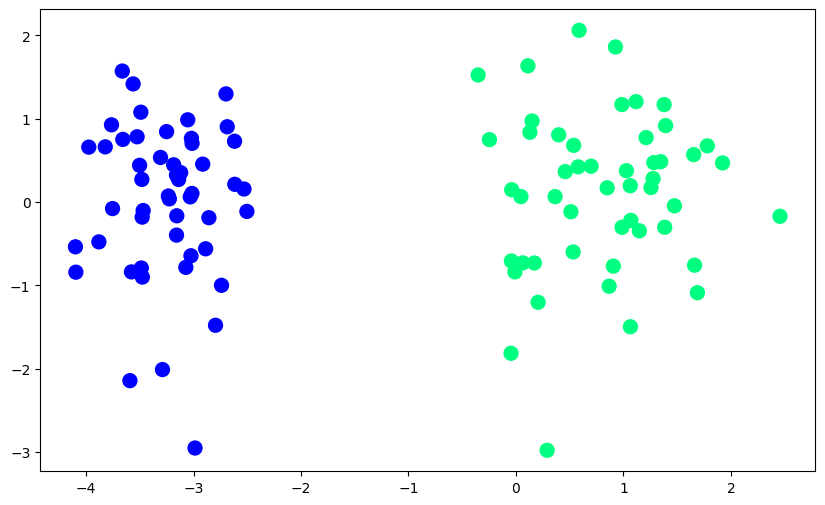

In [3]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.show()

## Perceptron Trick

In [4]:
def perceptron_trick(X, y):
    X = np.insert(X, 0, 1, axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.01
    
    for i in range(1000):
        sample_index = np.random.randint(0, X.shape[0])
        dot_product = np.dot(weights, X[sample_index])
        y_hat = step(dot_product)
        weights = weights + lr*(y[sample_index] - y_hat)*X[sample_index]

    return weights[0], weights[1:] 

In [5]:
def step(dot_product):
    return 1 if dot_product > 0 else 0

In [6]:
intercept_1, coef_1 = perceptron_trick(X, y)
print(intercept_1, coef_1)

1.2000000000000002 [1.03450489 0.48531508]


In [7]:
m1 = -(coef_1[0] / coef_1[1])
b1 = -(intercept_1 / coef_1[1])

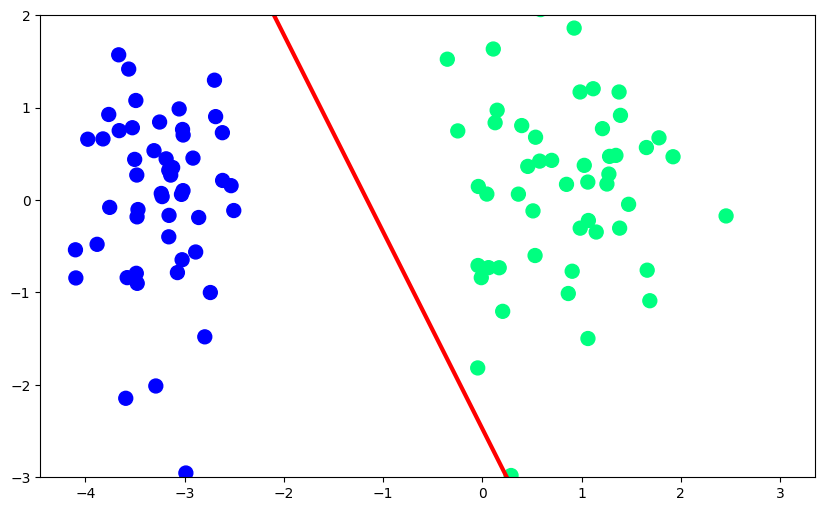

In [8]:
x_input1 = np.linspace(-3, 3, 100)
y_input1 = m1*x_input1 + b1

plt.figure(figsize=(10, 6))
plt.plot(x_input1, y_input1, color='red', linewidth=3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)
plt.ylim(-3, 2)
plt.show()

In [9]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X,y)

LogisticRegression()

In [10]:
m_lor = -(lor.coef_[0][0]/lor.coef_[0][1])
b_lor = -(lor.intercept_/lor.coef_[0][1])

In [11]:
x_input_lor = np.linspace(-3,3,100)
y_input_lor = m_lor*x_input_lor + b_lor

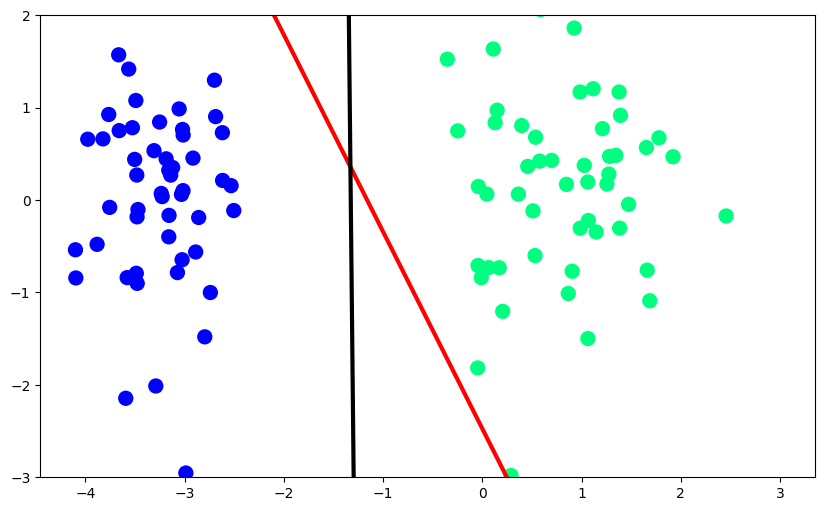

In [12]:
plt.figure(figsize=(10,6))
plt.plot(x_input1, y_input1, color='red', linewidth=3)
plt.plot(x_input_lor, y_input_lor, color='black', linewidth=3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)
plt.ylim(-3,2)
plt.show()

## Sigmoid Function

In [13]:
def perceptron_trick(X, y):
    X = np.insert(X, 0, 1, axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.01
    
    for i in range(1000):
        sample_index = np.random.randint(0, X.shape[0])
        dot_product = np.dot(weights, X[sample_index])
        y_hat = sigmoid(dot_product)
        weights = weights + lr*(y[sample_index] - y_hat)*X[sample_index]

    return weights[0], weights[1:] 

In [14]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [15]:
intercept_2, coef_2 = perceptron_trick(X, y)
print(intercept_2, coef_2)

1.4140848669301371 [1.80401877 0.5282573 ]


In [16]:
m2 = -(coef_2[0] / coef_2[1])
b2 = -(intercept_2 / coef_2[1])

In [17]:
x_input2 = np.linspace(-3, 3, 100)
y_input2 = m2*x_input2 + b2

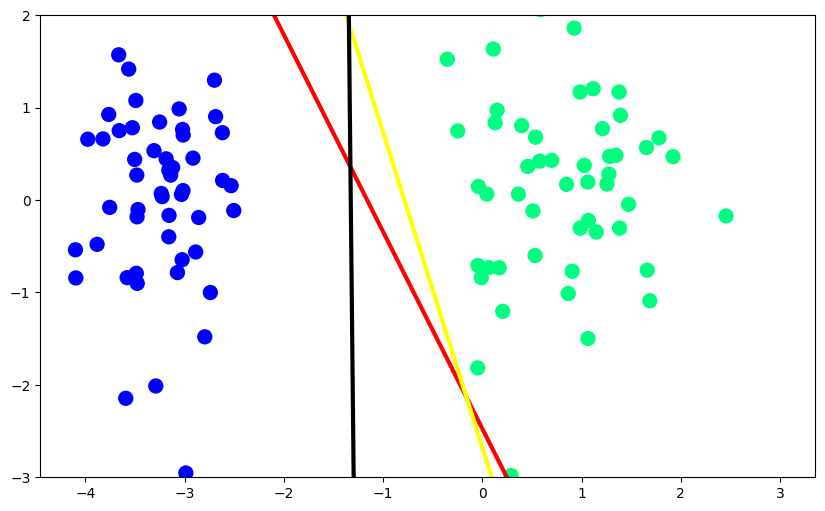

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(x_input1, y_input1, color='red', linewidth=3)
plt.plot(x_input2, y_input2, color='yellow', linewidth=3)
plt.plot(x_input_lor, y_input_lor, color='black', linewidth=3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)
plt.ylim(-3, 2)
plt.show()

## Gradient Descent

In [19]:
def gradient_descent(X, y):
    X = np.insert(X, 0, 1, axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.5
    m = X.shape[0]
    for i in range(3000):
        dot_product = np.dot(X, weights)
        y_hat = sigmoid(dot_product)
        weights = weights + (lr*np.dot((y - y_hat), X))/m
    return weights[0], weights[1:] 

In [20]:
intercept_3, coef_3 = gradient_descent(X, y)
print(intercept_3, coef_3)

5.326795923389574 [4.48732321 0.18187793]


In [21]:
m3 = -(coef_3[0] / coef_3[1])
b3 = -(intercept_3 / coef_3[1])

In [22]:
x_input3 = np.linspace(-3, 3, 100)
y_input3 = m3*x_input3 + b3

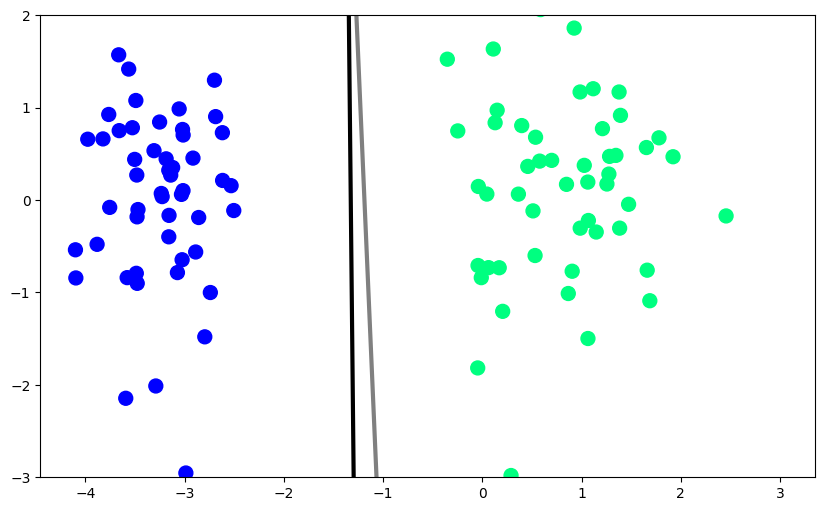

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(x_input3, y_input3, color='gray', linewidth=3)
plt.plot(x_input_lor, y_input_lor, color='black', linewidth=3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)
plt.ylim(-3, 2)
plt.show()